# 0. Setup

In [1]:
%%capture
!pip install shap

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle 
import scipy as sp
import shap

# 1. Load the dataset, set up the GPU, install the transformer

In [11]:
path='/content/drive/MyDrive/fake-news-adversarial-benchmark/'


# Define paths liar

dataset='LIAR'
model_path = path+'Model/liar_model2'
path_data_created='/content/drive/MyDrive/fake-news-adversarial-benchmark/data_created/liar/'


path_csv= path_data_created+'liar_1000.csv'

shap_path=path_data_created+'shapvalues_1000_liar.sav' 
path_labels=path_data_created+'labels_liar.npy'
outputs_path=path_data_created+'original_probs_liar_1000.pt'
"""
# Define paths Fake News

dataset='Fake News'
model_path = path+'Model/fn_model'
path_data_created='/content/drive/MyDrive/fake-news-adversarial-benchmark/data_created/fake_news/'

path_csv= path_data_created+'fake_news_1000.csv'
path_labels=path_data_created+'labels_fake_news.npy'
shap_path=path_data_created+'shapvalues_1000_fake_news.sav' 
outputs_path=path_data_created+'original_outputs_fake_news_1000.pt'

# Define paths imdb

dataset='IMDB'
path_data_created='/content/drive/MyDrive/fake-news-adversarial-benchmark/data_created/imdb/'

path_csv= path_data_created+'imdb_1000.csv'
path_labels=path_data_created+'labels_imdb.npy'

shap_path=path_data_created+'shapvalues_1000_imdb.sav' 
outputs_path=path_data_created+'original_probs_imdb_1000.pt'
"""




"\n# Define paths Fake News\n\ndataset='Fake News'\nmodel_path = path+'Model/fn_model'\npath_data_created='/content/drive/MyDrive/fake-news-adversarial-benchmark/data_created/fake_news/'\n\npath_csv= path_data_created+'fake_news_1000.csv'\npath_labels=path_data_created+'labels_fake_news.npy'\nshap_path=path_data_created+'shapvalues_1000_fake_news.sav' \noutputs_path=path_data_created+'original_outputs_fake_news_1000.pt'\n\n# Define paths imdb\n\ndataset='IMDB'\npath_data_created='/content/drive/MyDrive/fake-news-adversarial-benchmark/data_created/imdb/'\n\npath_csv= path_data_created+'imdb_1000.csv'\npath_labels=path_data_created+'labels_imdb.npy'\n\nshap_path=path_data_created+'shapvalues_1000_imdb.sav' \noutputs_path=path_data_created+'original_probs_imdb_1000.pt'\n"

In [12]:
path_final=path+'final_files/'+dataset+'/'
path_random=path_data_created+'random/shap_values_rand.sav'
shap_values = pickle.load(open(shap_path, 'rb'))
shap_values_rand = pickle.load(open(path_random, 'rb'))

# get the spearman correlation 

In [ ]:
#https://github.com/langlrsw/MEED/blob/master/imdb/eval_methods.py

#alternative https://huggingface.co/spaces/evaluate-metric/spearmanr
def eval_correlation(selection_1, selection_2, flag_abs=False):
    # Spearman Correlation Coefficient
    selection_1, selection_2 = np.reshape(selection_1, -1), np.reshape(selection_2, -1)
    if flag_abs:
        selection_1, selection_2 = np.abs(selection_1), np.abs(selection_2)

    temp_1, temp_2 = selection_1.argsort(), selection_2.argsort()
    ranks_1, ranks_2 = np.empty_like(temp_1), np.empty_like(temp_2)
    ranks_1[temp_1], ranks_2[temp_2] = np.arange(len(selection_1)), np.arange(len(selection_2))

    return np.corrcoef(selection_1, selection_2)[0][1]

In [ ]:
#get global correlation 
def flatten(l):
    return [item for sublist in l for item in sublist]
shap_values_flat=flatten(shap_values.values)
shap_values_rand_flat=flatten(shap_values_rand.values)
global_correlation = eval_correlation(shap_values_flat, shap_values_rand_flat, flag_abs=True)
global_correlation

-0.006322702199699097

In [ ]:
#get global correlation 
def flatten(l):
    return [item for sublist in l for item in sublist]
shap_values_flat=flatten(shap_values.values)
shap_values_rand_flat=flatten(shap_values_rand.values)
global_correlation = eval_correlation(shap_values_flat, shap_values_rand_flat, flag_abs=False)
global_correlation

-0.012618557381054118

In [ ]:
#getting the mean
#https://stats.stackexchange.com/questions/8019/averaging-correlation-values
mean_correlation_abs = np.mean([eval_correlation(shap_values.values[i], shap_values_rand.values[i], flag_abs=True) for i in range(len(shap_values))])
mean_correlation_abs


-0.007576312850357537

In [ ]:
mean_correlation = np.mean([eval_correlation(shap_values.values[i], shap_values_rand.values[i], flag_abs=False) for i in range(len(shap_values))])
mean_correlation

-0.005693244314364949

###imdb

In [ ]:
l_r=[]
for i in range(1000):
  l_r.append(len(shap_values_rand.values[i]))

In [ ]:
l_s=[]
for i in range(1000):
  l_s.append(len(shap_values.values[i]))

In [ ]:
for i in range(1000):
  if l_s[i]!=l_r[i]:
    print(i)

In [ ]:
i=429
print(shap_values.values[i])
print(shap_values_rand.values[i])

[ 0.          0.00165331  0.00388795  0.00606817  0.00689781  0.00276113
  0.00626898  0.00408006  0.00393268  0.00158444 -0.00392616 -0.00307512
 -0.00439024 -0.0037756   0.00739563 -0.00399816  0.        ]
[-0.12336909 -0.1679773  -0.04220241 -0.07718848  0.09273083  0.01992494
  0.01478755  0.00084817  0.00230122 -0.04147376  0.0078836  -0.05859039
  0.1095812   0.01657166 -0.05144311 -0.03451611  0.18922231]


In [ ]:
def flatten(l):
    o = []
    for m in range(len(l)):
        if m not in (361, 429, 909):
            for n in l[m]:
                o.append(n)
    return o


In [ ]:
shap_values_flat=flatten(shap_values.values)
shap_values_rand_flat=flatten(shap_values_rand.values)
global_correlation = eval_correlation(shap_values_flat, shap_values_rand_flat, flag_abs=True)
global_correlation

-0.006015425276218483

In [ ]:
global_correlation = eval_correlation(shap_values_flat, shap_values_rand_flat, flag_abs=False)
global_correlation

-0.012662612618650163

In [ ]:
def mean_corr(shap_values, shap_values_rand, flag_abs=False):
  m=[]
  for i in range(len(shap_values)):    
    if i not in (361, 429, 909):
      m.append(eval_correlation(shap_values.values[i], shap_values_rand.values[i], flag_abs=flag_abs))
  return np.mean(m)
mean_correlation_abs = mean_corr(shap_values, shap_values_rand, flag_abs=True)
mean_correlation_abs


-0.006999808147368226

In [ ]:
mean_correlation = mean_corr(shap_values, shap_values_rand, flag_abs=False)
mean_correlation

-0.005677219047523629

# a few graphs to get an overview

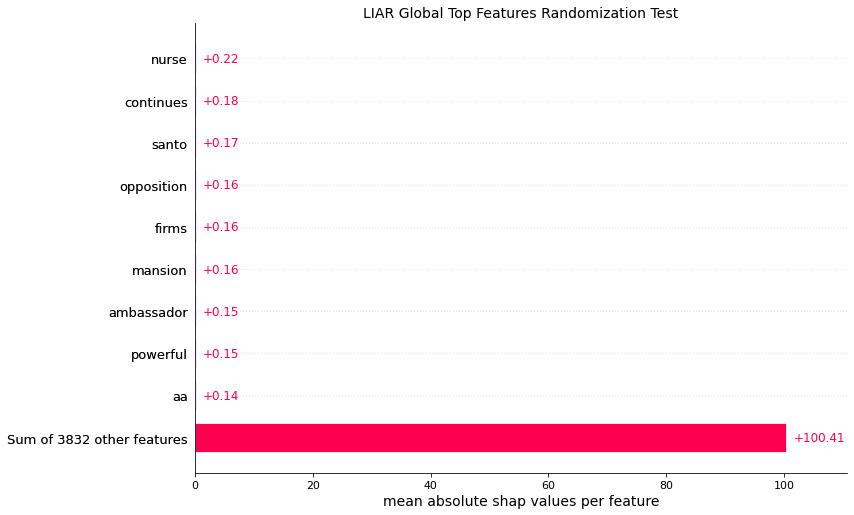

In [13]:
shap.plots.bar(shap_values_rand.abs.mean(0), show = False)
plt.title((dataset +" Global Top Features Randomization Test"), fontsize=14) 
plt.xlabel("mean absolute shap values per feature", fontsize=14)
plt.rcParams["font.family"] = "Arial"
plt.gcf().set_size_inches(11.69, 8.27)
plt.savefig((path_data_created+dataset+'global_shap_rand.png'), dpi=300, bbox_inches='tight')
plt.show()

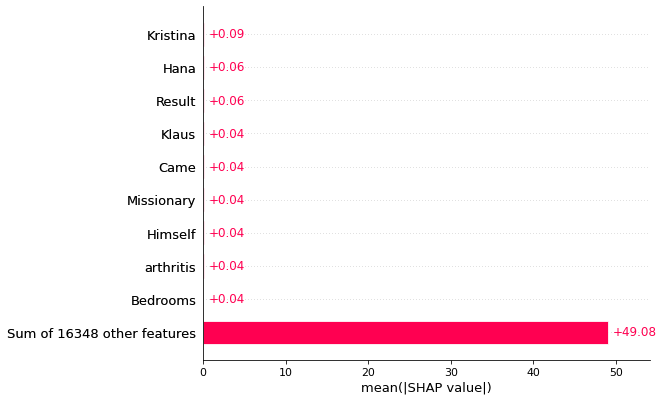

In [ ]:
shap.plots.bar(shap_values_rand)

In [ ]:
np.random.seed(42)
rand_index= np.random.randint(0, high=1000, size=5)

In [ ]:
shap.plots.text(shap_values_rand[rand_index[0]])